# I )  Manipulation DICOM

In [1]:
import matplotlib.pyplot as plt
from pydicom import dcmread
import pydicom
from pydicom.data import get_testdata_file
import numpy as np
import cv2


plt.rcParams['figure.figsize'] = (8.0, 5.0)              # definit la taille de figure plot
plt.rcParams['image.interpolation'] = 'nearest'
#plt.rcParams['image.cmap'] = 'gray'

In [2]:
fpath = get_testdata_file('CT_small.dcm')

In [3]:
ds = dcmread(fpath)

In [4]:
pat_name = ds.PatientName

In [5]:
display_name = pat_name.family_name + " , "+ pat_name.given_name

In [6]:
display_name

'CompressedSamples , CT1'

In [7]:
ds.PatientAge

'000Y'

In [8]:
ds.PatientBirthDate

''

In [9]:
ds.PatientID

'1CT1'

In [10]:
ds.Modality

'CT'

In [11]:
ds.StudyDate

'20040119'

In [12]:
print( ds.Rows , ds.Columns)  #taille d'image

128 128


In [13]:
ds.pixel_array

array([[175, 180, 166, ..., 203, 207, 216],
       [186, 183, 157, ..., 181, 190, 239],
       [184, 180, 171, ..., 152, 164, 235],
       ...,
       [906, 910, 923, ..., 922, 929, 927],
       [914, 954, 938, ..., 942, 925, 905],
       [959, 955, 916, ..., 911, 904, 909]], dtype=int16)

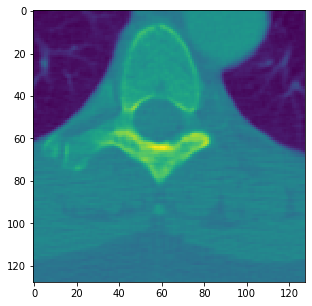

In [14]:
plt.imshow(ds.pixel_array)

In [15]:
ds.ImageType

['ORIGINAL', 'PRIMARY', 'AXIAL']

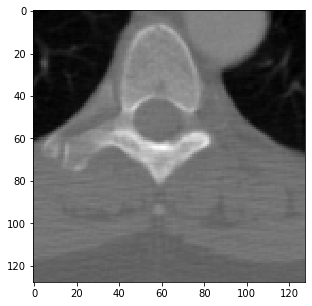

In [16]:
plt.imshow(ds.pixel_array, cmap=plt.cm.gist_gray)

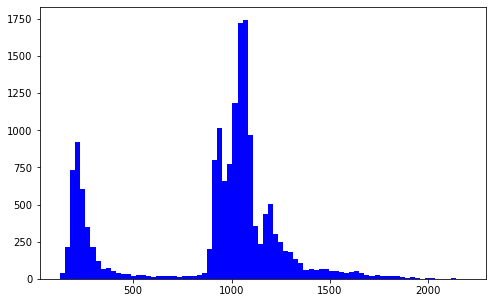

In [17]:
plt.hist(ds.pixel_array.flatten(), bins=80, color='b')
plt.show()

In [18]:
ds.dir("pat")

['AdditionalPatientHistory',
 'DistanceSourceToPatient',
 'ImageOrientationPatient',
 'ImagePositionPatient',
 'OtherPatientIDsSequence',
 'PatientAge',
 'PatientBirthDate',
 'PatientID',
 'PatientName',
 'PatientPosition',
 'PatientSex',
 'PatientWeight']

# II ) 

In [19]:
image = ds.pixel_array

In [20]:
slope = ds.RescaleSlope
intercepte = ds.RescaleIntercept

In [21]:
slope

'1.0'

In [22]:
intercepte

'-1024.0'

In [23]:
image.max()

2191

In [24]:
image.min()

128

In [25]:
hu_image = image * slope + intercepte

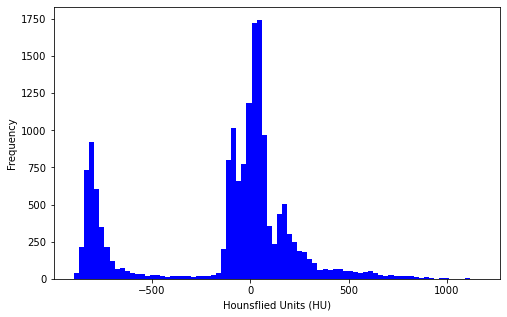

In [26]:
plt.hist(hu_image.flatten(), bins=80, color='b')
plt.xlabel("Hounsflied Units (HU)")
plt.ylabel("Frequency")
plt.show()

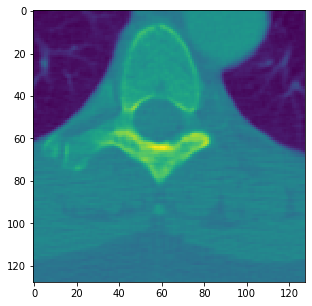

In [27]:
plt.imshow(hu_image)

In [28]:
hu_image.max()

1167.0

In [29]:
hu_image.min()

-896.0

# Amélioration du contraste en python avec opencv

In [30]:
img = cv2.imread("test_im.jpg")

In [31]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [32]:
img_gray

array([[ 17,  20,  10, ...,  13,  27,  10],
       [ 16,   9,  31, ...,  12,  15,  33],
       [  1,   8, 114, ..., 130, 122,   1],
       ...,
       [  1,   2,  82, ...,  42,  47,   0],
       [  0,   0,  78, ...,  37,  44,   0],
       [  1,   0,  75, ...,  37,  45,   0]], dtype=uint8)

In [33]:
img_equ = cv2.equalizeHist(img_gray)

In [34]:
img_equ

array([[ 10,  13,   5, ...,   7,  21,   5],
       [  9,   4,  27, ...,   6,   8,  31],
       [  1,   3, 234, ..., 246, 241,   1],
       ...,
       [  1,   1, 191, ...,  56,  74,   0],
       [  0,   0, 184, ...,  41,  63,   0],
       [  1,   0, 178, ...,  41,  66,   0]], dtype=uint8)

In [35]:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))

In [36]:
img_clahe = clahe.apply(img_gray)

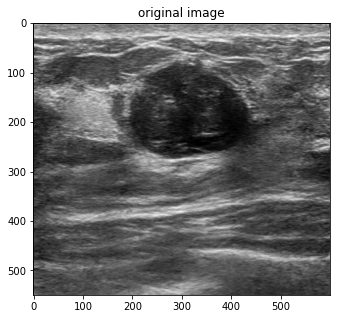

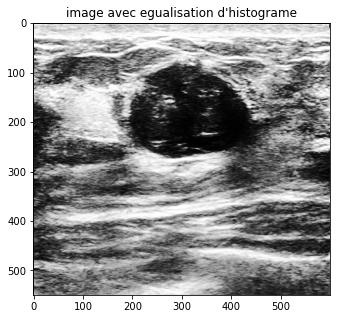

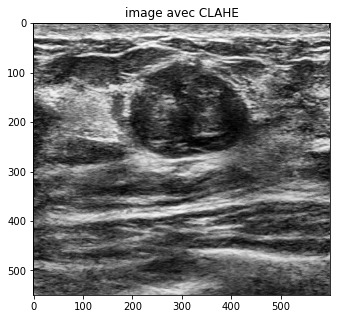

In [37]:
plt.imshow(img_gray, cmap='gray')
plt.title("original image")
plt.show()

plt.imshow(img_equ, cmap='gray')
plt.title("image avec egualisation d'histograme")
plt.show()

plt.imshow(img_clahe, cmap='gray')
plt.title("image avec CLAHE")
plt.show()

In [38]:
#Mesure de PSNR de chaque image amiléorée par apport a l'originale

In [39]:
from math import log10, sqrt

In [40]:
def PSNR(original, denoised):
    mse = np.mean((original - denoised)**2)
    if(mse == 0): #egal 0 c'est a dire n'a pas de bruit
        return 100
    max_pixel = 255.0
    psnr = 10 * log10(max_pixel**2 / sqrt(mse))
    return psnr

In [41]:
PSNR(img_gray, img_equ)

38.24148749854317

In [42]:
PSNR(img_gray, img_clahe)

38.164552169637716

# débruitage

In [43]:
from cv2.ximgproc import anisotropicDiffusion

In [44]:
img_brain = cv2.imread("brain_IRM.jpeg")

In [45]:
img_brain.shape

(225, 225, 3)

In [46]:
#img_brain = cv2.cvtColor(img_brain, cv2.COLOR_BGR2GRAY)

In [47]:
img_denoised_NLM = cv2.fastNlMeansDenoising(img_brain, None, 15, 7, 21)

In [48]:
img_denoised_AD = anisotropicDiffusion(img_brain, 1.0, 0.02, 10)

In [49]:
img_denoised_Gaussien = cv2.GaussianBlur(img_brain, (5,5), 0)

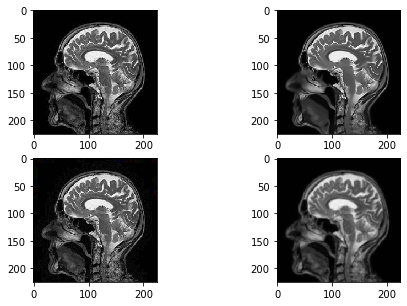

In [50]:
fig, ax = plt.subplots(2, 2)


ax[0, 0].imshow(img_brain, cmap='gray')
ax[0, 1].imshow(img_denoised_NLM, cmap='gray')
ax[1, 0].imshow(img_denoised_AD, cmap='gray')
ax[1, 1].imshow(img_denoised_Gaussien, cmap='gray')

In [51]:
PSNR(img_brain, img_brain)

100

In [52]:
PSNR(img_brain, img_denoised_NLM)

41.26646352391231

In [53]:
PSNR(img_brain, img_denoised_AD)

40.86889443569251

In [54]:
PSNR(img_brain, img_denoised_Gaussien)

39.97807817142659

# other

In [63]:
def transform_to_hu(medical_image, image):
    intercept = medical_image.RescaleIntercept
    slope = medical_image.RescaleSlope
    hu_image = image * slope + intercept

    return hu_image

def window_image(image, window_center, window_width):
    img_min = window_center - window_width // 2
    img_max = window_center + window_width // 2
    window_image = image.copy()
    window_image[window_image < img_min] = img_min
    window_image[window_image > img_max] = img_max
    
    return window_image

In [64]:
file_path = "dicom_dir/ID_0068_AGE_0072_CONTRAST_0_CT.dcm"
medical_image = dcmread(file_path)

print(medical_image)

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 196
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.14519.5.2.1.8421.4012.317384796867226472900782462270
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.40.0.13.1.1.1
(0002, 0013) Implementation Version Name         SH: 'dcm4che-1.4.34'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL', 'CT_SOM5 SPI']
(0008, 0016) SOP Class UID                       UI: CT Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.3.6.1.4.1.14519.5.2.1.8421.4012.317384796867226472900782462270
(0008, 0020) St

In [65]:
img = medical_image.pixel_array

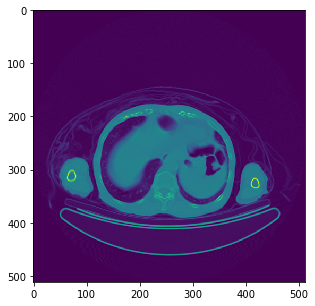

In [69]:
plt.imshow(img)

In [67]:
def remove_noise(file_path, display=False):
    medical_image = dcmread(file_path)
    image = medical_image.pixel_array
    
    hu_image = transform_to_hu(medical_image, image)
    brain_image = window_image(hu_image, 40, 80) #bone windowing
    
    segmentation = morphology.dilation(brain_image, np.ones((1, 1)))
    labels, label_nb = ndimage.label(segmentation)
    
    label_count = np.bincount(labels.ravel().astype(np.int))
    label_count[0] = 0

    mask = labels == label_count.argmax()
 
    mask = morphology.dilation(mask, np.ones((1, 1)))
    mask = ndimage.morphology.binary_fill_holes(mask)
    mask = morphology.dilation(mask, np.ones((3, 3)))
    masked_image = mask * brain_image
    return masked_image

In [68]:
remove_noise(file_path)

NameError: name 'morphology' is not defined

##### ######################################################################################

In [62]:
def intensity_seg(ct_numpy, min=-1000, max=-300):
    clipped = clip_ct(ct_numpy, min, max)
    return measure.find_contours(clipped, 0.95)

In [71]:
intensity_seg(medical_image)

NameError: name 'clip_ct' is not defined